<a href="https://colab.research.google.com/github/gauthiermartin/pytorch-deep-learning-course/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision

* See reference notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/video_notebooks/03_pytorch_computer_vision_video.ipynb
* See reference online book - https://www.learnpytorch.io/03_pytorch_computer_vision/#7-model-2-building-a-convolutional-neural-network-cnn

## 0. Computer vision library in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.dataset` - get datasets and dataloading function from PyTorch
* `torchvision.models`- get pretrained computer vision model that you can leverage for your own problems
* `torchvision.transforms` - functions to manipulate your vision data (images) to be suitable for user with an ML Model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [130]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor


# Import matplotlib for vizualization
import matplotlib.pyplot as plt

# Check version
print(torch.__version__)
print(torchvision.__version__)



2.0.1+cu118
0.15.2+cu118


## 1. Getting a dataset

The dataset will be using is FashionMNIST from torchvision.datasets

In [131]:
# Setup training data

train_data = datasets.FashionMNIST(
    root="data", # Where to download data to?
    train=True,  # Do we want to get the training dataset
    download=True, # Do we want to download?
    transform=ToTensor(), # How do we want to transform the data?
    target_transform=None# How do we want to transform the labels (targets)?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [132]:
len(train_data), len(test_data)

(60000, 10000)

In [133]:
## See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [134]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [135]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [136]:
# Check the shape of our image
print(f"Image shape: {image.shape} (C,H,W)")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) (C,H,W)
Image label: Ankle boot


## 1.2 Visualizing our data


Image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

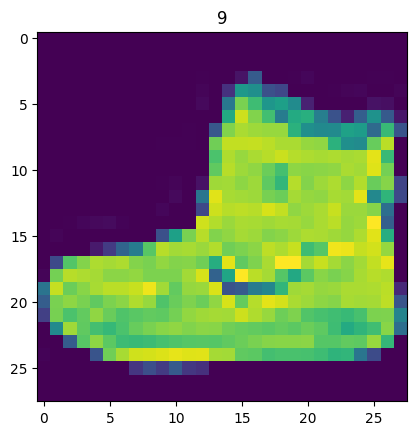

In [137]:
image, label = train_data[0]
print(f"Image Shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

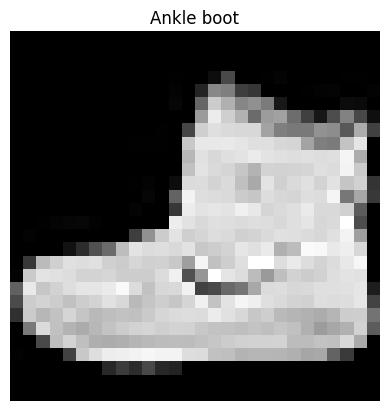

In [138]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

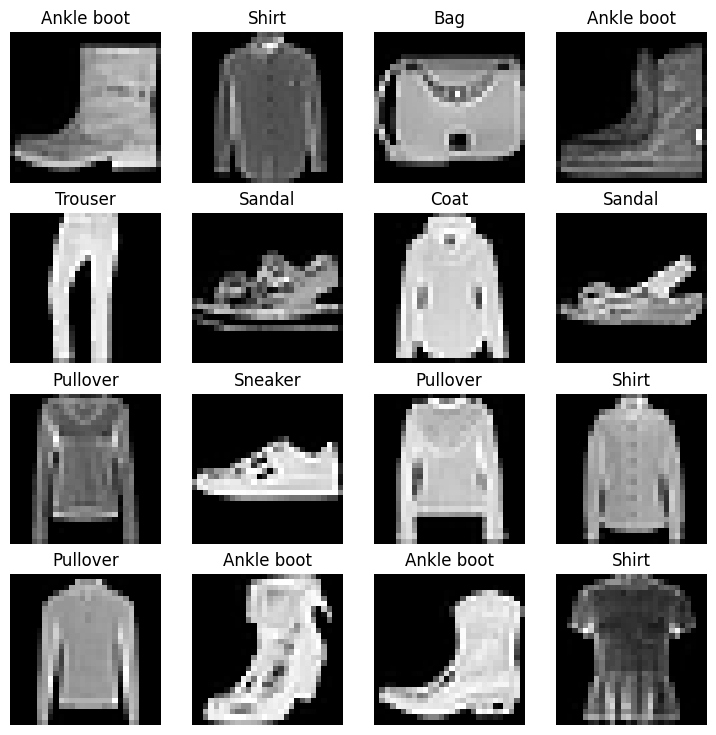

In [139]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)


Do you think these item of clothing (images) could be modelled with pure linear lines or will we need non-linearity => We will need non linearities

In [140]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare Dataloader

Right now, ou data is in form of PyTorch Datasets.

A DataLoader turns our dataset into a Python iterable.

More specificcally, we wqant to turn our data in batches (mini-batches)

Why would we do this ?



1.   It is more computationally efficient as in, your computer hardward may not be able to store in memory 60000 images in one hit. So we break it down (devise to conquer)
2.   It gives our neural network chacnes to update it's gradiant per epoch




In [141]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

#Easier to evaluate data with the proper order of the test data (Do not shuffle)
test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=32,
    shuffle=False,
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78e37dde0700>,
 <torch.utils.data.dataloader.DataLoader at 0x78e390308820>)

In [142]:
# Let's check out what we have created
print(f"Dataloaders: {train_dataloader}, {test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

Dataloaders: <torch.utils.data.dataloader.DataLoader object at 0x78e37dde0700>, <torch.utils.data.dataloader.DataLoader object at 0x78e390308820>
Length of train dataloader: 1875 batches of 32...
Length of test dataloader: 313 batches of 32...


In [143]:
60000/32, 10000/32

(1875.0, 312.5)

In [144]:
# Check out what is inside of the dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])
Label: 6, label_size: torch.Size([])


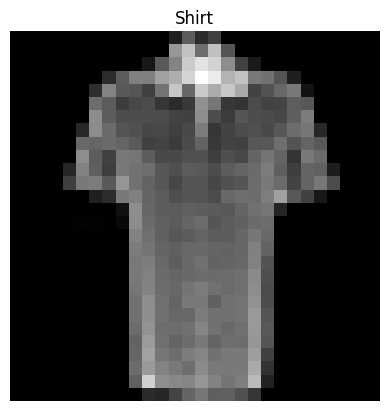

In [145]:
# Show a sample
torch.manual_seed(42)
torch.cuda.manual_seed(42)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size: {img.shape}")
print(f"Label: {label}, label_size: {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.BaseException

**In other words: Start simply and add complexity when needed !**

In [146]:
from torch.nn.modules import flatten
# Creating a flatten layer

flatten_model = nn.Flatten()

# Get a single sample

x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Print out what happpened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flatteningL {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flatteningL torch.Size([1, 784]) -> [color_channels, height*width]


In [147]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_stack(x)

In [148]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

device = "cpu"
# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # This is 28*28 (height*width)
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names)
).to(device)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [149]:
dummy_x = torch.rand([1, 1, 28, 28]).to(device)
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

from torch.nn.modules.loss import CrossEntropyLoss
### 3.1 Create a loss function, an optimizer metrics

* Loss function - since we are working with multi-class data, our loss function will be `nn.CrossEntropyLoss`
* Optmizer - our optimizer `torch.optim.SGD()` (stochastic gradiant descent)
* Evaluation metric - since we are working on a classification problem, let's use accurracy as our evaluation metric

In [150]:
import requests
from pathlib import Path

source = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_function.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  response = requests.get(source)
  with open("helper_functions.py", "wb") as f:
    f.write(response.content)

helper_function.py already exists, skipping download...


In [151]:
# Import accuracy metric
from helper_functions import accuracy_fn

In [152]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 - Creating a function to time our experiments

Machine Learning is very experimental.

Two of the main things you'll often want to track are :
1.   Model performance (loss, accuracy, etc...)
2.   How fast it runs



In [153]:
from timeit import default_timer as timer

def print_train_time(start: float, end:float, device: torch.device = None):
  """Prints diffrence between start and end time."""

  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")

  return total_time

In [154]:
start_time = timer()
#some code
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


4.4351000269671204e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train.loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss. *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

In [155]:
# Import tqdm for a progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_strart_on_cpu = timer()

# Set number of epochs (We'll keep it small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")

  #Training
  train_loss = 0

  # Devise to conquer
  # Add a loop to loop through the training batches
  for batch, (X_train, y_train) in enumerate(train_dataloader):
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    train_loss += loss # Accumulate train loss

    # 3. Optimizer zero-grad
    optimizer.zero_grad()

    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer step (gradiant descent)
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X_train)} / {len(train_dataloader.dataset)} samples")

  #Divide total train loss by length of train dataloader (# of batches)
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:

        # 1.Forward pass
        test_pred = model_0(X_test)

        # 2. Calculate loss
        test_loss += loss_fn(test_pred, y_test)

        # 3. Calculate accuracy
        test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1)) # .argmax(dim=1) making sure we get the label compared to the highest label (skipping sigmoid step equivalent)

    # Calculate test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test accuracy per batch
    test_acc /= len(test_dataloader)

  # Print out what's happenin
  print(f"\nTrain Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}\n")

# Calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(
    start=train_time_strart_on_cpu,
    end=train_time_end_on_cpu,
    device=str(next(model_0.parameters()).device)
)






  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train Loss: 0.5904 | Test Loss: 0.5095 | Test Acc: 82.0387

Epoch: 1
------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train Loss: 0.4763 | Test Loss: 0.4799 | Test Acc: 83.1969

Epoch: 2
------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train Loss: 0.4550 | Test Loss: 0.4766 | Test Acc: 83.4265

Train time on cpu: 27.511 seconds


## 4. Make predicitions and make model_0 predicition

In [156]:
torch.manual_seed(42)

def eval_model(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device = device
):
  """Returns a dictionary containing the results of model predicting on data_loader."""

  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)

      #Make predicition
      y_pred = model(X)

      # Accumulate loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(
          y_true=y,
          y_pred=y_pred.argmax(dim=1)
      ) #.argmax(dim=1) equivalent to using the sigmoid activation function here

    #Scale the loss and acc to find the avg per batch
    loss /= len(data_loader)
    acc //= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

In [157]:
# Calculate model results on test dataset

model_0_results = eval_model(
    model=model_0,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.0}

In [158]:
!nvidia-smi

Mon Aug  7 12:27:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    35W /  70W |   1125MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [159]:
## 5. Setup device agnostic code (to use GPU if there is one)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

We learned about the power of non-linearity in notebook 02


In [160]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # Flatten input into a single vector
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [161]:
# Create an instance of model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = FashionMNISTModelV1(
    input_shape=784, #output of the flatten layuer 28*28
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

In [162]:
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup, loss, optimizer and evaluation metrics

In [163]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss() # Mesure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1) # Tries to update our model parameters to reduce

### 6.2 Functionizing training and evaluation/testing loop

In [164]:
def train_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn,
    device: torch.device = device
):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()


  # Devise to conquer
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data onto target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate train loss
    train_acc += accuracy_fn(
      y_true=y,
      y_pred=y_pred.argmax(dim=1) # From logits to prediction label
    )
    # 3. Optimizer zero-grad
    optimizer.zero_grad()

    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer step (gradiant descent)
    optimizer.step()

  #Divide total train loss and acc by length of train dataloader (# of batches)
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [165]:
def test_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device = device
):
  """Perform test step with model going over data_loader. """

  test_loss, test_acc = 0, 0

  # Put model in eval mode
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1.Forward pass
      test_pred = model(X)

      # 2. Calculate loss
      test_loss += loss_fn(
          test_pred,
          y
      )

      # 3. Calculate accuracy
      test_acc += accuracy_fn(
          y_true=y,
          y_pred=test_pred.argmax(dim=1)
      ) # .argmax(dim=1) making sure we get the label compared to the highest label (skipping sigmoid step equivalent)

    # Calculate test loss average per batch
    test_loss /= len(data_loader)
    # Calculate the test accuracy per batch
    test_acc /= len(data_loader)

    # Print out what's happenin
    print(f"\nTest Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%\n")

In [166]:
from tqdm.auto import tqdm

# Set epochs count
epochs = 3

# Set the seed and start the timer
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start training time timer
train_time_strart_on_gpu = timer()

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")

  train_step(
      model=model_1,
      data_loader=train_dataloader,
      loss_fn=loss_fn,
      optimizer=optimizer,
      accuracy_fn=accuracy_fn,
      device=device)


  test_step(
      model=model_1,
      data_loader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device
  )

  # Calculate the training time
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(
    start=train_time_strart_on_gpu,
    end=train_time_end_on_gpu,
    device=str(next(model_1.parameters()).device)
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train Loss: 1.09199 | Train acc: 61.34%

Test Loss: 0.9564 | Test Acc: 65.00%

Epoch: 1
------
Train Loss: 0.78101 | Train acc: 71.93%

Test Loss: 0.7223 | Test Acc: 73.91%

Epoch: 2
------
Train Loss: 0.67027 | Train acc: 75.94%

Test Loss: 0.6850 | Test Acc: 75.02%

Train time on cuda:0: 29.457 seconds


In [167]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.0}

**Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU.

Why is this ?

1. It could be that the overhead for copying data/model to and from the GPU outweights the compute benefits iffered by the GPU.
2. The hardware you're using has a better CPU in terms compute capability that the GPU.

For more on how to make you models compute faster see here : https://horace.io/brrr_intro.html

In [168]:
# Get model 1 result dictionary
model_1_results = eval_model(
    model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

  0%|          | 0/313 [00:00<?, ?it/s]

In [169]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.0}

## Model 2: Building a convolutional neural network

CNN's are also know as ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

In [170]:
# Create a convolutional neural network

class FashionMNISTModelV2(nn.Module):
  """
  Model arcitecture that replicate the TinyVGG
  model from CNN explainer website
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d( # Convolution over 2 dimentional data (Width, Height).
            in_channels=input_shape,
            out_channels=hidden_units,
            kernel_size=3, # Could be a tuple (3,3)
            stride=1,
            padding=1 # Values we can set ourselves in our NN's are called hyperparameters.
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size=2
        )

    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size=2
        )

    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(
            in_features=hidden_units * 7 * 7, # there is a trick to calculating this...
            out_features=output_shape
        )
    )

  def forward(self, x: torch.Tensor)-> torch.Tensor:
    x = self.conv_block_1(x)
    # print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    # print (f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    # print (f"Output shape of classifier: {x.shape}")
    return x


In [171]:
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(
    input_shape=1, # numbers of color channel (1 for grayscale, 3 for colored images)
    hidden_units=10, # Same as tiny vgg
    output_shape=len(class_names)
).to(device)

### 7.1 Stepping through `nn.Conv2d()`

See the documentation for `nn.Conv2d()` here - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html


In [172]:
torch.manual_seed(42)

# Create a batch of images

images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]


print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [173]:
# Create a single `Conv2d` layer

conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=3,
    stride=1,
    padding=0
)

# Pass the data throught the convolutional layer

conv_output = conv_layer(test_image)
#conv_output
conv_output.shape

torch.Size([10, 62, 62])

### 7.2 Stepping though `nn.MaxPool2d`

See reference documentation - https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [174]:
test_image

tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
         [-1.4647, -1.9571,  0.1017,  ..., -1

In [175]:
# Print out the original image shape
print(f"Test image original shape:{test_image.shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(
    kernel_size=2
)

# Pass data through conv layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data throught the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going throught conv and max pool layers: {test_image_through_conv_and_max_pool.shape})")

Test image original shape:torch.Size([3, 64, 64])
Shape after going through conv_layer(): torch.Size([10, 62, 62])
Shape after going throught conv and max pool layers: torch.Size([10, 31, 31]))


In [176]:
# Create a random tensor with a similar number of dimensions to our images

random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random Tensor:\n{random_tensor}")
print(f"Random Tensor Shape: {random_tensor.shape}\n")

# Create a max pool layer

max_pool_layer = nn.MaxPool2d(
    kernel_size=2

)
max_pool_tensor = max_pool_layer(random_tensor)

print(f"Max Pool Tensor:\n {max_pool_tensor}")
print(f"Max Pool Tensor Shape: {max_pool_tensor.shape}")

Random Tensor:
tensor([[[[0.4963, 0.0045],
          [0.5534, 0.1379]]]])
Random Tensor Shape: torch.Size([1, 1, 2, 2])

Max Pool Tensor:
 tensor([[[[0.5534]]]])
Max Pool Tensor Shape: torch.Size([1, 1, 1, 1])


In [177]:
image.shape

torch.Size([1, 28, 28])

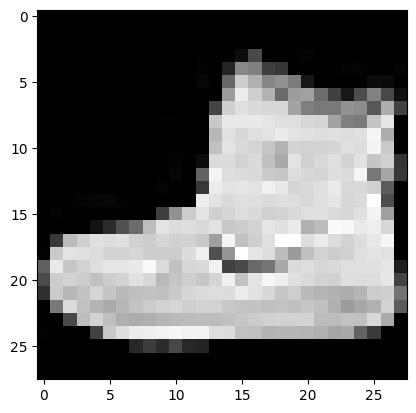

In [178]:
plt.imshow(image.squeeze(), cmap="gray")

In [179]:
# Pass image through model
model_2(image.unsqueeze(0).to(device))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.3 Setup a loss function and optimizer for `model_2`

In [180]:
# Setup loss function / eval metrics / optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_2.parameters(),
    lr=0.1
)


### 7.4 Train and testing `model_2` using our training and testing functions

In [181]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Mesure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n --------")
  train_step(
      model=model_2,
      data_loader=train_dataloader,
      loss_fn=loss_fn,
      optimizer=optimizer,
      accuracy_fn=accuracy_fn,
      device=device)

  test_step(
      model=model_2,
      data_loader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device
  )

train_time_end_model_2 = timer()

total_train_time_model_2 = print_train_time(
    start=train_time_start_model_2,
    end=train_time_end_model_2,
    device=device
)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
 --------
Train Loss: 0.59856 | Train acc: 78.20%

Test Loss: 0.3999 | Test Acc: 85.42%

Epoch: 1
 --------
Train Loss: 0.35924 | Train acc: 87.09%

Test Loss: 0.3527 | Test Acc: 86.99%

Epoch: 2
 --------
Train Loss: 0.32232 | Train acc: 88.28%

Test Loss: 0.3171 | Test Acc: 88.60%

Train time on cuda: 35.075 seconds


In [182]:
# Get model_2 results

model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31714361906051636,
 'model_acc': 88.0}

In [183]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.0}

In [184]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.0}

## 8. Compare rmodel results and training time

In [186]:
import pandas as pd

compare_results = pd.DataFrame([
    model_0_results,
    model_1_results,
    model_2_results,
])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.0
1,FashionMNISTModelV1,0.685001,75.0
2,FashionMNISTModelV2,0.317144,88.0


In [187]:
# Add training time to results comparison
compare_results["training_time"] = [
    total_train_time_model_0,
    total_train_time_model_1,
    total_train_time_model_2
]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.0,27.510842
1,FashionMNISTModelV1,0.685001,75.0,29.456763
2,FashionMNISTModelV2,0.317144,88.0,35.074588


Text(0, 0.5, 'Model')

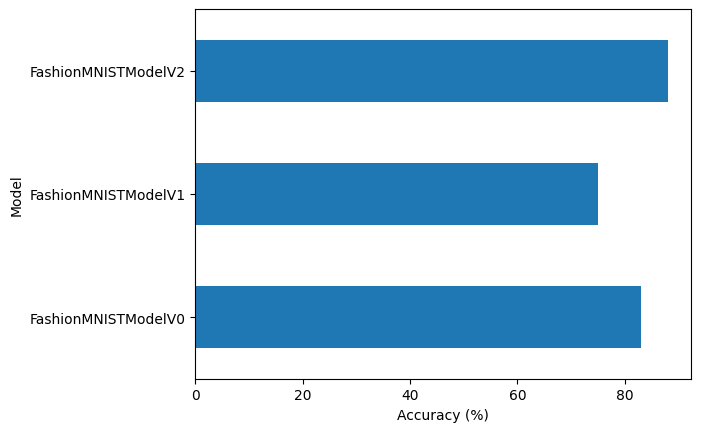

In [189]:
# Vizualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")

## 9. Make and evaluate random predictions with the best model

In [199]:
def make_predictions(
    model: torch.nn.Module,
    data: list,
    device: torch.device = device
):
  pred_probs = []

  model.to(device)
  model.eval()

  with torch.inference_mode():
    for sample in data:
      # Prepare the sample
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass
      pred_logits = model(sample)

      # Get the predicition probability (logits -> pred probability)
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)


      # Get pred_prob off the GPU for further calculation
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [192]:
import random
random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)


# View the first sample shape
test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

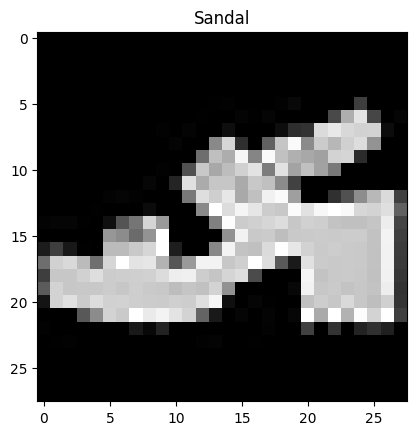

In [196]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [201]:
# Make predicitions
pred_probs = make_predictions(
    model=model_2,
    data=test_samples
)

pred_probs[:2]

tensor([[2.8922e-08, 1.3214e-08, 8.6347e-09, 3.5488e-08, 2.5839e-09, 9.9996e-01,
         1.5977e-07, 3.6591e-06, 6.2594e-06, 3.2475e-05],
        [6.5395e-02, 4.4976e-01, 6.8864e-03, 1.1660e-01, 1.0731e-01, 3.2843e-04,
         2.5235e-01, 2.7751e-04, 1.0313e-04, 9.9656e-04]])

In [204]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])